# Описание проекта:

- Данное исследование основано на работе с данными сервиса Яндекс Афиша. С его помощью пользователи могут узнавать информацию о мероприятиях в разных городах и покупать на них билеты. Сервис сотрудничает с партнёрами — организаторами мероприятий и билетными операторами, которые предоставляют информацию о событиях и выставляют билеты на продажу

- Цель: проведение исследовательского анализ данных, чтобы выявить инсайты об изменении пользовательских предпочтений и популярности событий осенью 2024 года, а также проверить гипотезы о разнице в поведении пользователей с мобильными и стационарными устройствами

# Используемые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

## Загружаем данные

In [2]:
orders_df = pd.read_csv('/datasets/final_tickets_orders_df.csv')
tickets_df = pd.read_csv('/datasets/final_tickets_events_df.csv')
convert_df = pd.read_csv('/datasets/final_tickets_tenge_df.csv')

### Таблица заказов

In [3]:
orders_df.describe()

,order_id,event_id,age_limit,revenue,tickets_count,total,days_since_prev
count,2.908490e+05,290849.000000,290849.000000,290849.000000,290849.000000,290849.000000,268909.000000
mean,4.326812e+06,438079.127702,10.211278,625.083054,2.754230,7526.465613,3.222525
std,2.497578e+06,147396.389016,6.518124,1227.316214,1.170467,15328.267730,11.355158
min,1.000000e+00,4436.000000,0.000000,-90.760000,1.000000,-358.850000,0.000000
25%,2.164039e+06,361961.000000,6.000000,116.790000,2.000000,2156.870000,0.000000
50%,4.327816e+06,498329.000000,12.000000,355.340000,3.000000,4771.390000,0.000000
75%,6.488606e+06,546284.000000,16.000000,809.750000,4.000000,8955.950000,1.000000
max,8.653108e+06,592325.000000,18.000000,81174.540000,57.000000,811745.400000,148.000000


In [4]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

- предварительный анализ таблицы заказов: даты нужно перевести в формат даты, в полях revenue есть отризательные значения и очень большие. Есть пропуски в стобце days_since_prev, но это нормально.

### Таблица событий

In [5]:
tickets_df.describe()

,event_id,city_id,venue_id
count,22427.000000,22427.000000,22427.000000
mean,442092.938422,1156.666696,2817.026887
std,157426.949023,3891.504931,1087.999845
min,4436.000000,2.000000,894.000000
25%,360927.500000,25.000000,1882.000000
50%,522824.000000,63.000000,2849.000000
75%,553721.000000,213.000000,3865.000000
max,592325.000000,37172.000000,4677.000000


In [6]:
tickets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [7]:
tickets_df.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


- данные таблицы о событиях выглядят хорошо. Нет пропусков, столбцы подписаны корректно.

### Таблица конверсии

In [8]:
convert_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


In [9]:
convert_df.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [10]:
convert_df.describe()

,nominal,curs
count,357.0,357.000000
mean,100.0,19.755818
std,0.0,0.833798
min,100.0,17.848600
25%,100.0,19.120200
50%,100.0,19.876000
75%,100.0,20.443300
max,100.0,21.937100


- таблица курса тоже выглядит правдоподобно, кроме формата даты.

Выводы по данным:
- предварительный анализ таблицы заказов: даты нужно перевести в формат даты, в полях revenue есть как отрицательные значения так и очень большие. Есть пропуски в стобце days_since_prev, но это нормально.
- данные таблицы о событиях выглядят хорошо. Нет пропусков
- таблица курса без видимых выбросов. Формат даты нужно поменять.
- столбцы в таблицах подписаны корректно, работать удобно

## Предобработка данных и подготовка их к исследованию

### Проверка таблиц на пропуски и дубликаты

#### Проверка категориальных данных orders_df

In [11]:
# Исправим тип данных на дату
orders_df['created_dt_msk'] = pd.to_datetime(orders_df['created_dt_msk'], errors = 'coerce')
orders_df['created_ts_msk'] = pd.to_datetime(orders_df['created_ts_msk'], errors = 'coerce')

In [12]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               290849 non-null  int64         
 1   user_id                290849 non-null  object        
 2   created_dt_msk         290849 non-null  datetime64[ns]
 3   created_ts_msk         290849 non-null  datetime64[ns]
 4   event_id               290849 non-null  int64         
 5   cinema_circuit         290849 non-null  object        
 6   age_limit              290849 non-null  int64         
 7   currency_code          290849 non-null  object        
 8   device_type_canonical  290849 non-null  object        
 9   revenue                290849 non-null  float64       
 10  service_name           290849 non-null  object        
 11  tickets_count          290849 non-null  int64         
 12  total                  290849 non-null  floa

In [13]:
for col in orders_df.select_dtypes(include=['object']).columns:
    print(f"\nКолонка: {col}")
    print(orders_df[col].unique())


Колонка: user_id
['0002849b70a3ce2' '0005ca5e93f2cf4' '000898990054619' ...
 'fffcd3dde79eb2c' 'fffeeb3c120cf0b' 'ffff00725179321']

Колонка: cinema_circuit
['нет' 'Другое' 'Киномакс' 'КиноСити' 'Москино' 'ЦентрФильм']

Колонка: currency_code
['rub' 'kzt']

Колонка: device_type_canonical
['mobile' 'desktop']

Колонка: service_name
['Край билетов' 'Мой билет' 'За билетом!' 'Лови билет!'
 'Билеты без проблем' 'Облачко' 'Лучшие билеты' 'Прачечная' 'Быстробилет'
 'Дом культуры' 'Весь в билетах' 'Билеты в руки' 'Тебе билет!'
 'Show_ticket' 'Городской дом культуры' 'Яблоко' 'Билет по телефону'
 'Выступления.ру' 'Росбилет' 'Шоу начинается!' 'Мир касс' 'Восьмёрка'
 'Телебилет' 'Crazy ticket!' 'Реестр' 'Быстрый кассир' 'КарандашРУ'
 'Радио ticket' 'Дырокол' 'Вперёд!' 'Кино билет' 'Цвет и билет' 'Зе Бест!'
 'Тех билет' 'Лимоны' 'Билеты в интернете']


Выводы по категориальным признакам
- Необходимые нам при анализе столбцы с названиями и валютой без явных признаков мусора и дублей.
- Пропусков или nan тоже нет
- Нормализация не требуется

In [14]:
# Проверяем дубли
orders_df.duplicated().sum()

0

In [15]:
# Смотрим пропуски
orders_df.isna().sum()

order_id                     0
user_id                      0
created_dt_msk               0
created_ts_msk               0
event_id                     0
cinema_circuit               0
age_limit                    0
currency_code                0
device_type_canonical        0
revenue                      0
service_name                 0
tickets_count                0
total                        0
days_since_prev          21940
dtype: int64

In [16]:
# Найдём все дубли без order_id
orders_no_id = orders_df.drop(columns=['order_id'])

In [17]:
orders_no_id.duplicated().sum()

30

In [18]:
len(orders_df)

290849

In [19]:
# Удаляем дубли, их всего 30
subset_cols = orders_df.columns.difference(['order_id'])
orders_df = orders_df.drop_duplicates(subset=subset_cols, keep='first')
len(orders_df)

290819

#### Проверка категориальных данных tickets_df

In [20]:
for col in tickets_df.select_dtypes(include=['object']).columns:
    print(f"\nКолонка: {col}")
    print(tickets_df[col].unique())


Колонка: event_name
['e4f26fba-da77-4c61-928a-6c3e434d793f'
 '5cc08a60-fdea-4186-9bb2-bffc3603fb77'
 '8e379a89-3a10-4811-ba06-ec22ebebe989' ...
 '196f51a8-344a-462a-b806-a8467fd0e5fa'
 '9283cb32-2750-43cd-b57e-dde9ccd5552e'
 'f4952452-27ff-4d03-9adb-f7836430f83b']

Колонка: event_type_description
['спектакль' 'балет' 'мюзикл' 'опера' 'концерт' 'шоу' 'ёлка'
 'цирковое шоу' 'событие' 'фестиваль' 'спортивное мероприятие' 'выставка'
 'спорт' 'оперетта' 'экскурсия' 'рок-мюзикл' 'музыкальный спектакль'
 'снегурочка' 'подарок' 'кукольный спектакль']

Колонка: event_type_main
['театр' 'концерты' 'ёлки' 'другое' 'стендап' 'выставки' 'спорт']

Колонка: organizers
['№4893' '№1931' '№4896' ... '№4817' '№5105' '№4552']

Колонка: region_name
['Североярская область' 'Светополянский округ' 'Каменевский регион'
 'Лесодальний край' 'Медовская область' 'Широковская область'
 'Тепляковская область' 'Травяная область' 'Зоринский регион'
 'Серебринская область' 'Яблоневская область' 'Глиногорская область'


In [21]:
# Проверяем дубли
tickets_df.duplicated().sum()

0

In [22]:
# Смотрим пропуски
tickets_df.isna().sum()

event_id                  0
event_name                0
event_type_description    0
event_type_main           0
organizers                0
region_name               0
city_name                 0
city_id                   0
venue_id                  0
venue_name                0
venue_address             0
dtype: int64

#### Проверка и исправление данных convert_df

In [23]:
convert_df['data'] = pd.to_datetime(convert_df['data'], errors = 'coerce')

In [24]:
convert_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     357 non-null    datetime64[ns]
 1   nominal  357 non-null    int64         
 2   curs     357 non-null    float64       
 3   cdx      357 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 11.3+ KB


### Проверим на выбросы ключевые количественные столбцы tickets_count и revenue

In [25]:
orders_rub = orders_df[orders_df['currency_code'] == 'rub']
orders_kzt = orders_df[orders_df['currency_code'] == 'kzt']

#### Проверка столбца tickets_count

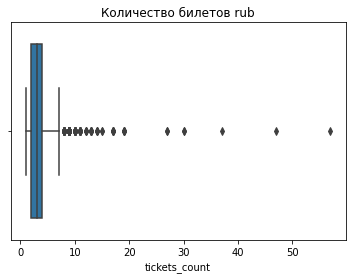

In [26]:
sns.boxplot(data=orders_rub, x='tickets_count')
plt.title('Количество билетов rub')
plt.show()

- не вижу серьёзных выбросов. 50 билетов вполне могли покупать группы школьников или корпоративные клиенты

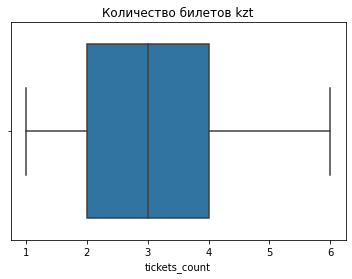

In [27]:
sns.boxplot(data=orders_kzt, x='tickets_count')
plt.title('Количество билетов kzt')
plt.show()

- выбросов нет

#### Проверка столбца revenue

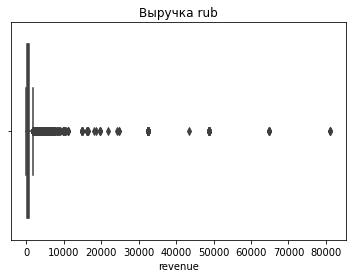

In [28]:
sns.boxplot(data=orders_rub, x='revenue')
plt.title('Выручка rub')
plt.show()

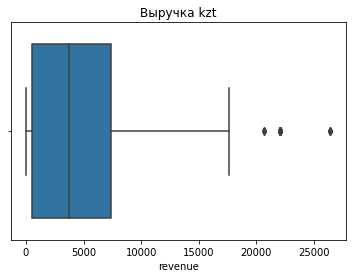

In [29]:
sns.boxplot(data=orders_kzt, x='revenue')
plt.title('Выручка kzt')
plt.show()

- наблюдаются выбросы, чтож, удалим их, их немного

In [30]:
# Считаем 99-й перцентиль для каждой валюты
rub_vybros = orders_rub['revenue'].quantile(0.99)
kzt_vybros = orders_kzt['revenue'].quantile(0.99)

In [31]:
# Находим заказы выше порога
rub_order_id = orders_rub.loc[orders_rub['revenue'] > rub_vybros, 'order_id']
kzt_order_id = orders_kzt.loc[orders_kzt['revenue'] > kzt_vybros, 'order_id']

In [32]:
high_orders_all = pd.concat([rub_order_id, kzt_order_id], ignore_index=True)

In [33]:
df_clean = orders_df[~orders_df['order_id'].isin(high_orders_all)]

In [34]:
print(f"Удалено {len(high_orders_all)} выбросов")
print(f"Осталось {len(df_clean)} заказов после очистки")

Удалено 2887 выбросов
Осталось 287932 заказов после очистки


#### Объединим таблицы и добавим несколько столбцов

In [35]:
df = orders_df.merge(
    convert_df,
    left_on=orders_df['created_dt_msk'].dt.date,
    right_on=convert_df['data'].dt.date,
    how='left'
)

In [36]:
df = df.merge(tickets_df, on='event_id', how='left')

In [37]:
df = df.drop(columns='key_0')

- добавим столбец revenue_rub

In [38]:
df['revenue_rub'] = np.where(
    df['currency_code'] == 'rub',
    df['revenue'],
    df['revenue'] * (df['curs'] / 100)
)

- добавим теперь one_ticket_revenue_rub — рассчитанную как выручка с продажи одного билета на мероприятие

In [39]:
df['one_ticket_revenue_rub'] = df['revenue'] / df['tickets_count']

- выделим месяц в отдельный столбец month

In [40]:
df['month'] = df['created_dt_msk'].dt.month

- Добавим столбец season с информацией о сезонности, включая такие категории, как: 'лето', 'осень', 'зима', 'весна'

In [41]:
def season(month):
    if month in [12, 1, 2]:
        return 'зима'
    elif month in [3, 4, 5]:
        return 'весна'
    elif month in [6, 7, 8]:
        return 'лето'
    elif month in [9, 10, 11]:
        return 'осень'
    else:
        return None

In [42]:
df['season'] = df['month'].apply(season)

In [43]:
df

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",1521.94,380.485000,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",289.45,144.725000,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",1258.57,314.642500,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",8.49,4.245000,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",1390.41,463.470000,10,осень
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290814,368620,fffcd3dde79eb2c,2024-10-27,2024-10-27 18:00:57,33189,нет,6,rub,mobile,965.57,...,Каменевский регион,Глиногорск,213.0,3952.0,"Творческое объединение ""Модуль"" Инкорпорэйтед","алл. Глинки, д. 9/8 к. 67",965.57,241.392500,10,осень
290815,368562,fffcd3dde79eb2c,2024-10-27,2024-10-27 17:53:53,33189,нет,6,rub,mobile,1448.36,...,Каменевский регион,Глиногорск,213.0,3952.0,"Творческое объединение ""Модуль"" Инкорпорэйтед","алл. Глинки, д. 9/8 к. 67",1448.36,241.393333,10,осень
290816,8473772,fffcd3dde79eb2c,2024-10-30,2024-10-30 13:37:43,205231,нет,16,rub,desktop,178.95,...,Каменевский регион,Глиногорск,213.0,3470.0,"Клуб киноманов ""Верность"" Лтд","пр. Титова, д. 5 стр. 68",178.95,89.475000,10,осень
290817,5526067,fffeeb3c120cf0b,2024-09-24,2024-09-24 10:07:42,454526,нет,18,rub,desktop,661.53,...,Широковская область,Ягодиновка,239.0,2449.0,"Гильдия художников ""Флит"" Инк","пр. Макарова, д. 4",661.53,330.765000,9,осень


Объединили все таблицы в один датафрейм и подготовили данные к дальнейшему анализу

Создали несколько новых столбцов
- revenue_rub - привели выручку к одной валюте - рубли
- one_ticket_revenue_rub — рассчитали выручку с продажи одного билета на мероприятие
- month — выделили месяц оформления заказа
- season — создали столбец с информацией о сезонности, включая такие категории, как: 'лето', 'осень', 'зима', 'весна'

In [44]:
removed_data = (290849 - len(df)) / 290849
print(f"Доля удалённых данных: {removed_data:.5%}")

Доля удалённых данных: 0.01031%


## Исследовательский анализ данных

### Для каждого месяца найдём количество заказов и проверим, фиксируется ли увеличение заказов от июня к ноябрю 2024 года

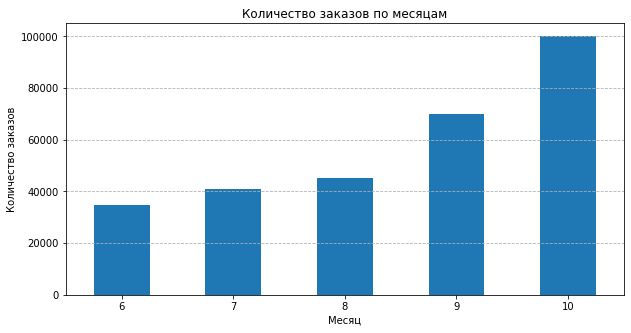

In [45]:
orders_by_month = df.groupby('month')['order_id'].count()

plt.figure(figsize=(10, 5))
orders_by_month.plot(kind='bar')

plt.title('Количество заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

### Для осеннего и летнего периодов сравним распределение заказов билетов по разным категориям: тип мероприятия, тип устройства, категория мероприятия по возрастному рейтингу

In [46]:
seasons = df[df['season'].isin(['лето', 'осень'])] # По сути не нужно, у нас других месяцев нет

- тип мероприятия

In [47]:
event_type = (
    seasons
    .groupby(['season', 'event_type_main'])['order_id']
    .count()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .reset_index(name='share')
)

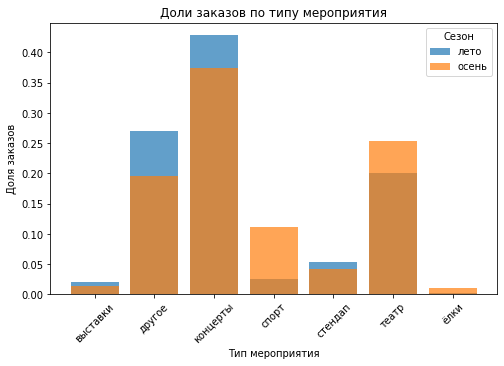

In [48]:
plt.figure(figsize=(8, 5))
for season in event_type['season'].unique():
    subset = event_type[event_type['season'] == season]
    plt.bar(subset['event_type_main'], subset['share'], label=season, alpha=0.7)

plt.title('Доли заказов по типу мероприятия')
plt.xlabel('Тип мероприятия')
plt.ylabel('Доля заказов')
plt.legend(title='Сезон')
plt.xticks(rotation=45)
plt.show()

- тип устройства

In [49]:
device_type = (
    seasons
    .groupby(['season', 'device_type_canonical'])['order_id']
    .count()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .reset_index(name='share')
)

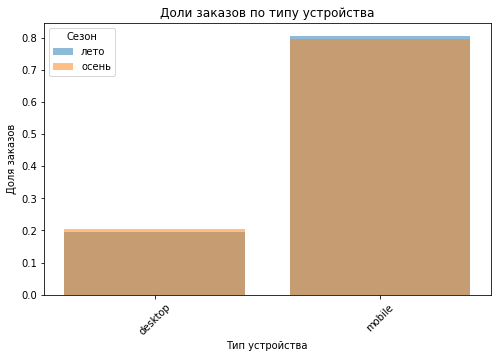

In [50]:
plt.figure(figsize=(8, 5))
for season in device_type['season'].unique():
    subset = device_type[device_type['season'] == season]
    plt.bar(subset['device_type_canonical'], subset['share'], label=season, alpha=0.5)

plt.title('Доли заказов по типу устройства')
plt.xlabel('Тип устройства')
plt.ylabel('Доля заказов')
plt.legend(title='Сезон')
plt.xticks(rotation=45)
plt.show()

- категория мероприятия по возрастному рейтингу

In [51]:
age_rating = (
    seasons
    .groupby(['season', 'age_limit'])['order_id']
    .count()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .reset_index(name='share')
)

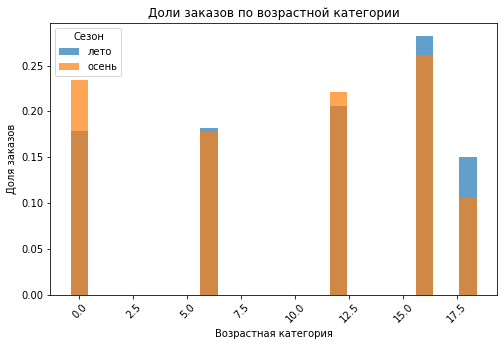

In [52]:
plt.figure(figsize=(8, 5))
for season in age_rating['season'].unique():
    subset = age_rating[age_rating['season'] == season]
    plt.bar(subset['age_limit'], subset['share'], label=season, alpha=0.7)

plt.title('Доли заказов по возрастной категории')
plt.xlabel('Возрастная категория')
plt.ylabel('Доля заказов')
plt.legend(title='Сезон')
plt.xticks(rotation=45)
plt.show()

### Изучим изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью

In [53]:
avg_price = (
    df
    .groupby(['season', 'event_type_main'])
    .agg(avg_price=('revenue_rub', 'mean'))
    .reset_index()
)

In [54]:
avg_price

,season,event_type_main,avg_price
0,лето,выставки,228.381672
1,лето,другое,246.112988
2,лето,концерты,855.095403
3,лето,спорт,157.853783
4,лето,стендап,683.693561
5,лето,театр,617.010304
6,лето,ёлки,835.013732
7,осень,выставки,237.394592
8,осень,другое,230.535857
9,осень,концерты,769.778212


In [55]:
avg_price_pivot = avg_price.pivot(index='event_type_main', columns='season', values='avg_price').reset_index()

In [56]:
avg_price_pivot

season,event_type_main,лето,осень
0,выставки,228.381672,237.394592
1,другое,246.112988,230.535857
2,концерты,855.095403,769.778212
3,спорт,157.853783,160.541544
4,стендап,683.693561,737.101669
5,театр,617.010304,509.957404
6,ёлки,835.013732,763.007379


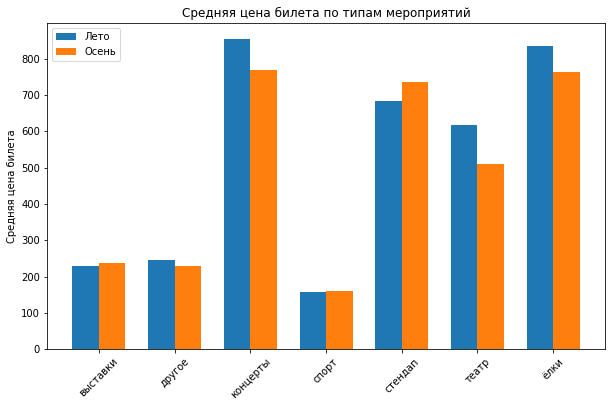

In [57]:
x = np.arange(len(avg_price_pivot['event_type_main']))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, avg_price_pivot['лето'], width, label='Лето')
plt.bar(x + width/2, avg_price_pivot['осень'], width, label='Осень')

plt.ylabel('Средняя цена билета')
plt.title('Средняя цена билета по типам мероприятий')
plt.xticks(x, avg_price_pivot['event_type_main'], rotation=45)
plt.legend()
plt.show()

### Выводы

- по большей части Летом цена билетов у многих категорий мероприятий выше или равна осенней. Лишь стендап осенью дороже становится

In [58]:
avg_price_pivot['relative_change'] = (avg_price_pivot['осень'] - avg_price_pivot['лето']) / avg_price_pivot['лето'] * 100

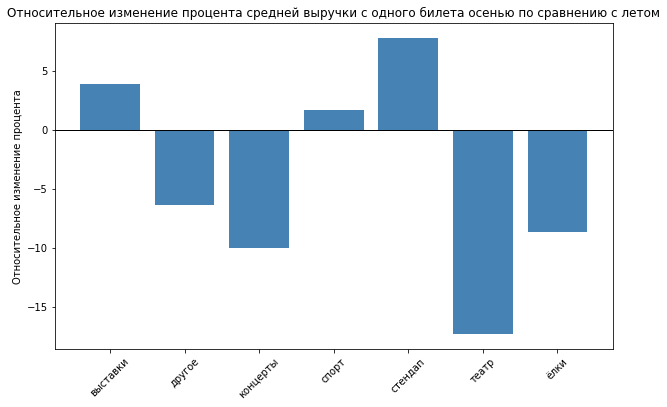

In [59]:
plt.figure(figsize=(10, 6))

plt.bar(avg_price_pivot['event_type_main'], avg_price_pivot['relative_change'], color='steelblue')
plt.axhline(0, color='black', linewidth=1)

plt.title("Относительное изменение процента средней выручки с одного билета осенью по сравнению с летом")
plt.ylabel("Относительное изменение процента")
plt.xticks(rotation=45)
plt.show()

Вывод
- осенью и летом средняя цена на билеты не сильно колеблются и отличаются - в пределах 5-10%
- единественно что осенью сильно (относительно других), падает средняя цена билета в театр - более 15%

## Осенняя активность пользователей

In [60]:
autumn = df[df['season'].isin(['осень'])]

In [61]:
daily_autumn = (
    autumn
    .groupby('created_dt_msk')
    .agg(
        orders_count=('order_id', 'nunique'),
        dau=('user_id', 'nunique'),
        total_tickets=('tickets_count', 'sum'),
        total_revenue=('revenue_rub', 'sum')
    )
)

In [62]:
daily_autumn['orders_per_user'] = daily_autumn['orders_count'] / daily_autumn['dau']
daily_autumn['avg_ticket_price'] = daily_autumn['total_revenue'] / daily_autumn['total_tickets']

In [63]:
daily_autumn = daily_autumn[['orders_count', 'dau', 'orders_per_user', 'avg_ticket_price']].reset_index()

In [64]:
daily_autumn

,created_dt_msk,orders_count,dau,orders_per_user,avg_ticket_price
0,2024-09-01,1348,569,2.369069,207.113443
1,2024-09-02,1391,580,2.398276,198.575109
2,2024-09-03,5124,783,6.544061,77.992818
3,2024-09-04,1785,688,2.594477,187.553517
4,2024-09-05,1960,745,2.630872,198.081671
...,...,...,...,...,...
56,2024-10-27,2866,1039,2.758422,191.016792
57,2024-10-28,2859,988,2.893725,178.987563
58,2024-10-29,2889,1005,2.874627,185.268391
59,2024-10-30,2960,1050,2.819048,190.487484


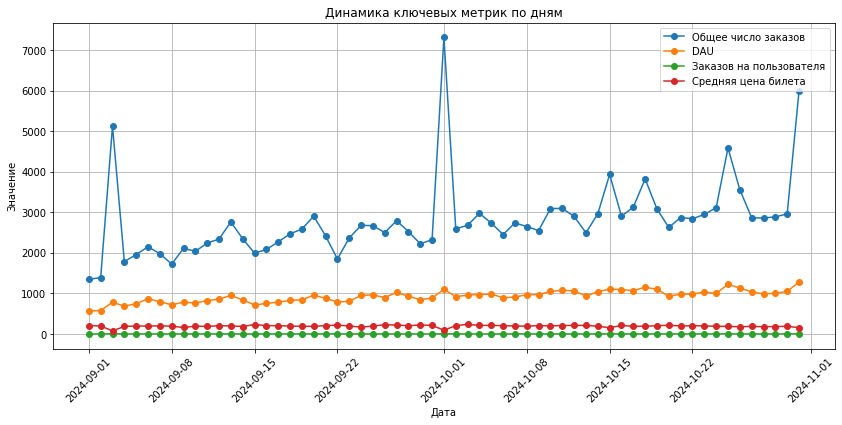

In [65]:
plt.figure(figsize=(14, 6))
plt.plot(daily_autumn['created_dt_msk'], daily_autumn['orders_count'], label='Общее число заказов', marker='o')
plt.plot(daily_autumn['created_dt_msk'], daily_autumn['dau'], label='DAU', marker='o')
plt.plot(daily_autumn['created_dt_msk'], daily_autumn['orders_per_user'], label='Заказов на пользователя', marker='o')
plt.plot(daily_autumn['created_dt_msk'], daily_autumn['avg_ticket_price'], label='Средняя цена билета', marker='o')

plt.title('Динамика ключевых метрик по дням')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

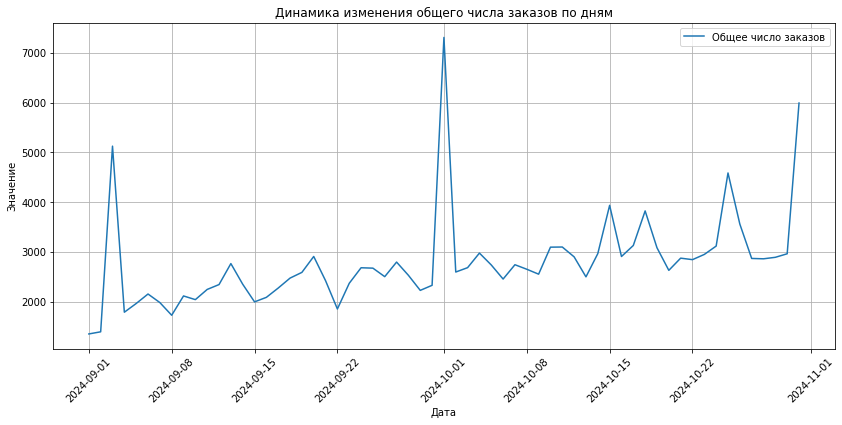

In [66]:
plt.figure(figsize=(14, 6))
plt.plot(daily_autumn['created_dt_msk'], daily_autumn['orders_count'], label='Общее число заказов')

plt.title('Динамика изменения общего числа заказов по дням')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

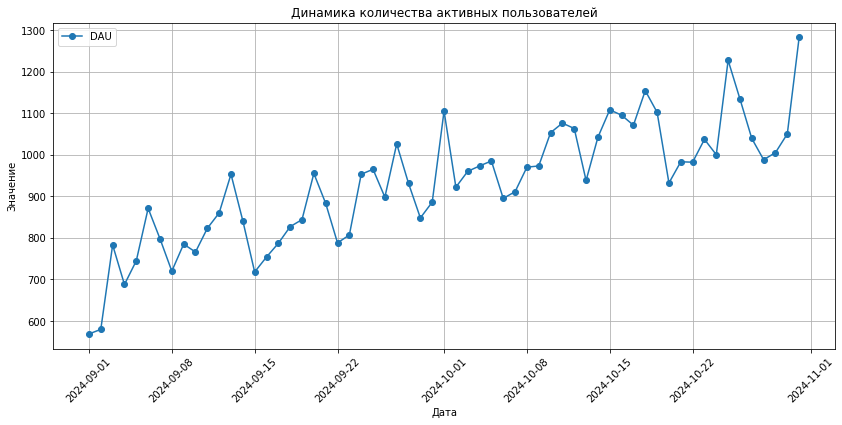

In [67]:
plt.figure(figsize=(14, 6))
plt.plot(daily_autumn['created_dt_msk'], daily_autumn['dau'], label='DAU', marker='o')

plt.title('Динамика количества активных пользователей')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

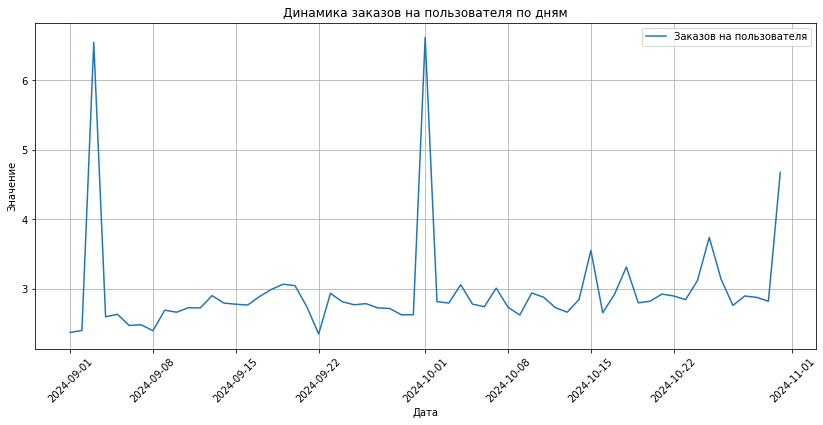

In [68]:
plt.figure(figsize=(14, 6))

plt.plot(daily_autumn['created_dt_msk'], daily_autumn['orders_per_user'], label='Заказов на пользователя')

plt.title('Динамика заказов на пользователя по дням')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

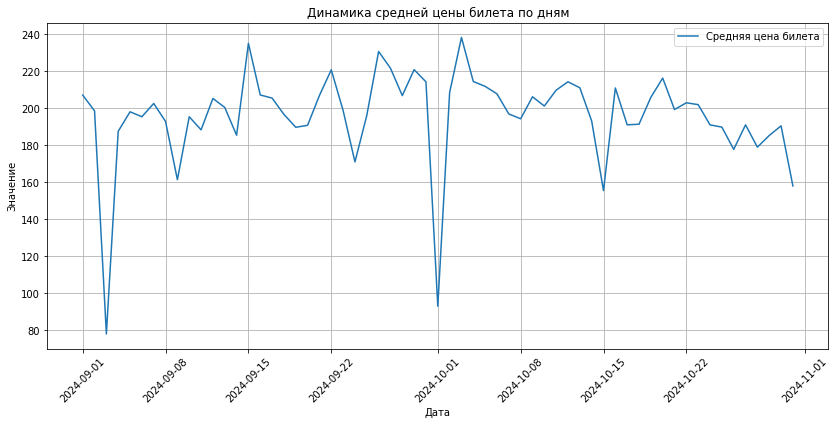

In [69]:
plt.figure(figsize=(14, 6))
plt.plot(daily_autumn['created_dt_msk'], daily_autumn['avg_ticket_price'], label='Средняя цена билета')

plt.title('Динамика средней цены билета по дням')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Выводы:
- Динамика изменения общего числа заказов по дням показывает уверенный рост с 2000 в среднем в начале осени до 3000 в конце октября
- Динамика количества активных пользователей тоже растёт. Он и увеличивает показатели общего числа заказов
- Динамика заказов на пользователя как и Динамика средней цены билета остаются примерно на одном уровне с незначительными колебаниями. Есть пики и выбивающиеся значения в обоих показателях, и они объяснимы проводимыми акциями - снижение цены, увеличивает количество заказов. То есть это сапостовимые пики, возникающие в одно время.
- Осенью 2024 года наблюдается положительная динамика: общее число заказов и количество активных пользователей постепенно увеличиваются. Среднее число заказов на одного пользователя остаётся стабильным, с пиками в отдельные дни. Средняя стоимость билета колеблется, но не демонстрирует чёткой тенденции

- Изучим теперь недельную цикличность

In [70]:
autumn['day_of_week'] = autumn['created_dt_msk'].dt.dayofweek

/tmp/ipykernel_101/2555928083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autumn['day_of_week'] = autumn['created_dt_msk'].dt.dayofweek


In [71]:
weekly_dau = autumn.groupby('day_of_week').agg(
    dau=('user_id', 'nunique'),
    total_orders=('order_id', 'nunique')
).reset_index()

In [72]:
weekly_dau['day_type'] = np.where(
    weekly_dau['day_of_week'].isin([5, 6]),
    'Выходной',
    'Будни'
)

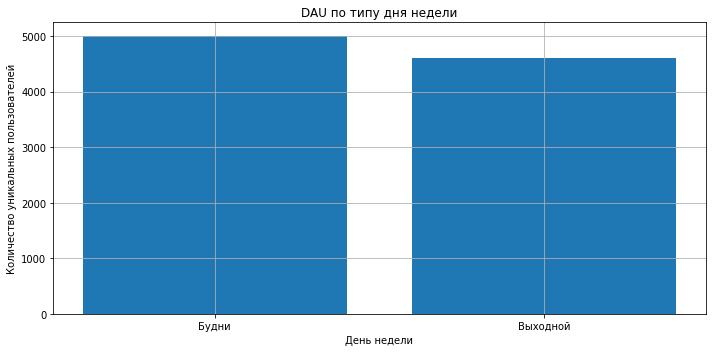

In [73]:
plt.figure(figsize=(10, 5))
plt.bar(weekly_dau['day_type'], weekly_dau['dau'])

plt.title('DAU по типу дня недели')
plt.xlabel('День недели')
plt.ylabel('Количество уникальных пользователей')
plt.grid(True)
plt.tight_layout()
plt.show()

Выводы промежуточные:
- С начала осени количество заказов и активных пользователей показывает небольшой рост
- При этом цена билета и количество заказов на пользователя остаются на одном уровне
- В будние дни активность чуть выше

## Популярные события и партнёры

### Популярные события

In [74]:
region_agg = (
    df
    .groupby('region_name')
    .agg(
        unique_events=('event_id', 'nunique'),
        total_orders=('order_id', 'count')
    )
    .reset_index()
)

In [75]:
region_agg['unique_events_prop'] = region_agg['unique_events'] / region_agg['unique_events'].sum()
region_agg['total_orders_prop'] = region_agg['total_orders'] / region_agg['total_orders'].sum()

In [76]:
region_agg.sort_values(by='unique_events', ascending=False)

,region_name,unique_events,total_orders,unique_events_prop,total_orders_prop
23,Каменевский регион,5983,91049,0.266777,0.313334
60,Североярская область,3814,44043,0.170063,0.151569
77,Широковская область,1233,16457,0.054978,0.056635
57,Светополянский округ,1075,7606,0.047933,0.026175
52,Речиновская область,702,6293,0.031302,0.021657
...,...,...,...,...,...
68,Теплоозёрский округ,2,7,0.000089,0.000024
66,Сосноводолинская область,2,10,0.000089,0.000034
33,Лесноярский край,2,19,0.000089,0.000065
56,Светолесский край,2,24,0.000089,0.000083


- Для признаков с большим количеством уникальных значений стоит визуализировать топ-n значений по частоте, чтобы низкочастотные регионы не смещали акцент в анализе

In [77]:
region_agg.sort_values(by='unique_events', ascending=False).head(10)

,region_name,unique_events,total_orders,unique_events_prop,total_orders_prop
23,Каменевский регион,5983,91049,0.266777,0.313334
60,Североярская область,3814,44043,0.170063,0.151569
77,Широковская область,1233,16457,0.054978,0.056635
57,Светополянский округ,1075,7606,0.047933,0.026175
52,Речиновская область,702,6293,0.031302,0.021657
74,Травяная область,683,5045,0.030454,0.017362
11,Горицветская область,551,5166,0.024569,0.017778
61,Серебринская область,542,5610,0.024167,0.019306
78,Яблоневская область,535,6179,0.023855,0.021264
69,Тепляковская область,530,4388,0.023632,0.015101


### Популярные партнёры

In [78]:
partners_agg = (
    df
    .groupby('service_name')
    .agg(
        unique_events=('event_id', 'nunique'),
        total_orders=('order_id', 'count'),
        total_revenue=('revenue_rub', 'sum')
    )
    .reset_index()
)

In [79]:
partners_agg['unique_events_prop'] = partners_agg['unique_events'] / partners_agg['unique_events'].sum()
partners_agg['total_orders_prop'] = partners_agg['total_orders'] / partners_agg['total_orders'].sum()
partners_agg['total_revenue_prop'] = partners_agg['total_revenue'] / partners_agg['total_revenue'].sum()

In [80]:
partners_agg.sort_values(by='total_orders', ascending=False)

,service_name,unique_events,total_orders,total_revenue,unique_events_prop,total_orders_prop,total_revenue_prop
3,Билеты без проблем,4263,63696,2.670165e+07,0.174099,0.219023,1.653882e-01
21,Лови билет!,4884,41122,1.766525e+07,0.199461,0.141401,1.094173e-01
5,Билеты в руки,3544,40359,1.338741e+07,0.144736,0.138777,8.292068e-02
24,Мой билет,1310,34840,2.347710e+07,0.053500,0.119800,1.454155e-01
25,Облачко,2348,26642,2.164407e+07,0.095892,0.091610,1.340619e-01
22,Лучшие билеты,1763,17793,2.823437e+06,0.072000,0.061182,1.748818e-02
8,Весь в билетах,867,16849,1.804930e+07,0.035408,0.057936,1.117961e-01
26,Прачечная,1027,10273,4.900985e+06,0.041942,0.035324,3.035637e-02
19,Край билетов,253,6207,6.703959e+06,0.010332,0.021343,4.152386e-02
30,Тебе билет!,1062,5227,3.073664e+06,0.043372,0.017973,1.903806e-02


Вывод:
- Каменевский регион и Североярская область явно лидируют в количестве мероприятий и на них приходится почти половина от всех заказов
- Аналогично среди партнёров, тройка лидеров: "Билеты без проблем", "Лови билет!" и "Билеты в руки" делают половину кассы и бОльшую часть заказов

## Статистический анализ данных

- у нас есть две независимые выборки, используем тест для двух выборок. И принимаем во внимание, что дисперсии нам не известны, поэтому можно применить т_тест Уэлча

### Первая проверка

Нулевая гипотеза H₀: Среднее количество заказов на одного пользователя мобильного приложения равно с пользователями стационарных устройств

Альтернативная гипотеза H₁: Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств

- Перед гипотезой важно проверить, имеются ли клиенты, которе находятся в обобих сегментах одновременно. Если они имеются, то их нужно удалить, иначе нарушается гомогенность выборок

In [81]:
multiple_tests = autumn.groupby('user_id')['device_type_canonical'].nunique()

In [82]:
users_in_multiple_tests = multiple_tests[multiple_tests > 1].index

In [83]:
len(users_in_multiple_tests)

3274

In [84]:
autumn_ab = autumn[~autumn['user_id'].isin(users_in_multiple_tests)]

- неявные дубликаты найдены и обработаны

In [85]:
device_orders = (
    autumn_ab.groupby(['user_id', 'device_type_canonical'])
    .agg(total_orders=('order_id', 'count'))
    .reset_index()
)

In [86]:
mobile_group = device_orders[device_orders['device_type_canonical']=='mobile']['total_orders']
desc_group = device_orders[device_orders['device_type_canonical']=='desktop']['total_orders']

In [87]:
alpha = 0.05

stat, p_value = ttest_ind(
    mobile_group, 
    desc_group, 
    equal_var=False,
    alternative='greater'
)


if p_value > alpha:
    print(f'p-value = {round(p_value, 5)}')
    print('Принимаем нулевую гипотезу о равенстве количества заказов с мобильных и десктопных устройств')
    print('Интерпретация: Количество заказов в двух выборках не различается или различия не статистически значимо')
else:
    print(f'p-value = {round(p_value, 5)}')
    print('Принимаем гипотезу Н1 о том, что пользователи мобильных устройств делают больше заказов')
    print('Интерпретация: Количество заказов в двух выборках различается')

p-value = 0.0
Принимаем гипотезу Н1 о том, что пользователи мобильных устройств делают больше заказов
Интерпретация: Количество заказов в двух выборках различается


### Вторая проверка

Нулевая гипотеза H₀: Среднее время между заказами пользователей мобильных приложений не отличается по сравнению с пользователями стационарных устройств

Альтернативная гипотеза H₁: Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств

- чтобы не искажать анализ с пользователями с 1 заказом, оставим только тех, у кого были более 1 заказа

In [88]:
filtered_autumn = autumn_ab.dropna(subset=['days_since_prev'])

In [89]:
print(len(filtered_autumn))
len(autumn_ab)

26838


34701

In [90]:
mobile_group_2 = filtered_autumn[filtered_autumn['device_type_canonical']=='mobile']['days_since_prev']
desc_group_2 = filtered_autumn[filtered_autumn['device_type_canonical']=='desktop']['days_since_prev']

In [104]:
filtered_autumn[filtered_autumn['device_type_canonical']=='mobile'].groupby('user_id')['days_since_prev'].mean()

user_id
0005ca5e93f2cf4    75.000000
000898990054619    51.000000
000a55a418c128c    16.000000
001e7037d013f0f    43.500000
00245c702bc343e    27.500000
                     ...    
ffdfac9273f943b     1.000000
ffe364dd8211157    41.333333
ffe73c50cbd71fc     0.000000
ffed3ff067d4f12    26.000000
fff13b79bd47d7c    20.666667
Name: days_since_prev, Length: 7068, dtype: float64

In [108]:
alpha = 0.05

stat, p_value = ttest_ind(
    mobile_group_2, 
    desc_group_2, 
    equal_var=False,
    alternative='greater'
)


if p_value > alpha:
    print(f'p-value = {round(p_value, 5)}')
    print('Принимаем нулевую гипотезу о равенстве среднего времени между заказами с мобильных и десктопных устройств')
    print('Интерпретация: Количество заказов в двух выборках не различается или различия не статистически значимо')
else:
    print(f'p-value = {round(p_value, 5)}')
    print('Принимаем гипотезу Н1 о том, что пользователи мобильных устройств в среднем имеют меньше времени между заказами')
    print('Интерпретация: Количество заказов в двух выборках различается')

p-value = 1.0
Принимаем нулевую гипотезу о равенстве среднего времени между заказами с мобильных и десктопных устройств
Интерпретация: Количество заказов в двух выборках не различается или различия не статистически значимо


In [113]:
# Разделение данных на группы
mobile_users = filtered_autumn[filtered_autumn['device_type_canonical'] == 'mobile']
desktop_users = filtered_autumn[filtered_autumn['device_type_canonical'] == 'desktop']

# Инициализация и проверка данных
print("[1/6] Инициализация данных:")
print(f"Начальное количество пропусков: {filtered_autumn['days_since_prev'].isnull().sum()}")

# Глубокая копия данных
mobile_clean = mobile_users.copy(deep=True)
desktop_clean = desktop_users.copy(deep=True)

[1/6] Инициализация данных:
Начальное количество пропусков: 0


In [114]:
mobile_grouped = np.asarray(mobile_clean.groupby('user_id')['days_since_prev'].mean(), dtype=float)
desktop_grouped = np.asarray(desktop_clean.groupby('user_id')['days_since_prev'].mean(), dtype=float)

In [115]:
# Проведение тестов и выводы
# ==================================================

print("\n Проверка гипотезы, тест Манна-Уитни:")
print("Формулировка гипотез:")
print("H₀: Среднее время между заказами мобильных пользователей ≤ десктопных")
print("H₁: Среднее время между заказами мобильных пользователей > десктопных\n")

try:
    # Выполнение U-теста с односторонней альтернативой
    stat, p_value = mannwhitneyu(
        mobile_grouped, 
        desktop_grouped,
        alternative='greater'  # Проверяем, что мобильные > десктоп
    )
    
    # Вывод результатов
    print(f"• Статистика теста: {stat:.2f}")
    print(f"• p-value: {p_value:.4f}")
    
    # Интерпретация
    alpha = 0.05
    if p_value < alpha:
        print("\nЗаключение: Отвергаем H₀ (p < 0.05)")
        print("→ Среднее время между заказами мобильных пользователей статистичски значимо выше")
    else:
        print("\nЗаключение: Нет оснований отвергнуть H₀")
        print("→ Статистически значимых различий не обнаружено")
        
except Exception as e:
    print(f"Ошибка при выполнении теста: {str(e)}")
    print("Проверьте входные данные и размеры выборок")

# Дополнительные метрики эффекта
print("\nДополнительные показатели:")
print(f"Медиана мобильных: {np.median(mobile_grouped):.2f} дней")
print(f"Медиана десктоп: {np.median(desktop_grouped):.2f} дней")
print(f"Разница медиан: {np.median(mobile_grouped) - np.median(desktop_grouped):.2f} дней")
print(f"Размер эффекта (r-value): {stat/(len(mobile_grouped)*len(desktop_grouped)):.3f}")



 Проверка гипотезы, тест Манна-Уитни:
Формулировка гипотез:
H₀: Среднее время между заказами мобильных пользователей ≤ десктопных
H₁: Среднее время между заказами мобильных пользователей > десктопных

Ошибка при выполнении теста: name 'mannwhitneyu' is not defined
Проверьте входные данные и размеры выборок

Дополнительные показатели:
Медиана мобильных: 14.00 дней
Медиана десктоп: 17.00 дней
Разница медиан: -3.00 дней
Размер эффекта (r-value): -0.000


## Общий вывод и рекомендации

Общие выводы:

- Мы работали с данным сервисов продаж билетов на мероприятия. Данные охватывают весь летний период и два месяца осени 2024 года
- В данных представлено 353 города и 81 регион
- Концерты и театры являются самыми популярными мероприятиями
- Обнаружили, что осенью количество заказов увеличивается, при этом стоимость самих мероприятий немного снижается по сравнению с летом
- При этом средняя выручка остаётся стабильной
- Мобильные устройства и стационарные компьютеры являются самыми популярными устройствами
- Но всё же с мобильных устройств люди чаще делают заказы

Рекомендации бизнесу:
- мы обнаружили явную сезонность в активности покупателей. С начала осени, по сравнению с летом, показатели начинают расти. К этому надо быть готовыми.
- Партнёры "Билеты без проблем", "Лови билет!" и "Билеты в руки" делают половину выручки. Есть смысл с ними работать более активно, либо привлекать более активно других партнёров
- Нужно учитывать и тот факт, что осенью снижается средняя цена билетов на большинство мероприятий, но активность пользователей это возмещает. Например в театр цена падает сильно, а вот на стендап растёт. Стоит обратить внимание на эти площадки.